In [1]:
import numpy as np
import pandas as pd

In [73]:
A = pd.DataFrame(np.random.normal(loc=30,scale=10,size=20).astype(int))

In [113]:
B = pd.DataFrame(np.random.normal(loc=38,scale=5,size=20).astype(int))

In [109]:
C = pd.DataFrame(np.random.normal(loc=35,scale=10,size=20).astype(int))

In [114]:
ABC = pd.concat([A,B,C], axis=1)
ABC.columns = ["group_A", "group_B", "group_C"]

In [105]:
ABC.head()

,group_A,group_B,group_C
0,19,36,31
1,15,36,34
2,12,43,36
3,49,41,35
4,24,41,34


In [75]:
#Normality Assumption
from scipy.stats import shapiro
shapiro(ABC.group_A)

ShapiroResult(statistic=np.float64(0.959272736372697), pvalue=np.float64(0.5294243831615408))

In [115]:
shapiro(ABC.group_B)

ShapiroResult(statistic=np.float64(0.9721767456365942), pvalue=np.float64(0.8000258828220166))

In [111]:
shapiro(ABC.group_C)

ShapiroResult(statistic=np.float64(0.941147962635303), pvalue=np.float64(0.2520424344997825))

In [116]:
#Variance Homogenity Assumption
from scipy.stats import levene
levene(ABC.group_A, ABC.group_B, ABC.group_C)

LeveneResult(statistic=np.float64(2.905581395348836), pvalue=np.float64(0.06286134024650653))

In [119]:
#hypothesis test
from scipy.stats import f_oneway
p = f_oneway(ABC.group_A, ABC.group_B, ABC.group_C)

In [121]:
print("p = {:.5f}".format(p[1]))

p = 0.00005


<Axes: >

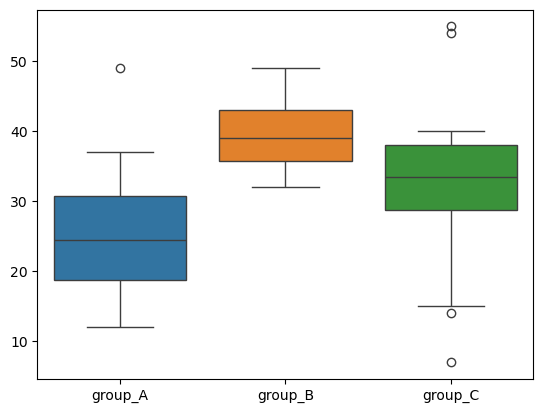

In [124]:
import seaborn as sns
sns.boxplot(ABC)

In [125]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
group_A,20.0,25.45,9.046517,12.0,18.75,24.5,30.75,49.0
group_B,20.0,39.15,4.637093,32.0,35.75,39.0,43.00,49.0
group_C,20.0,32.20,11.678140,7.0,28.75,33.5,38.00,55.0


In [128]:
#Nonparametric Hypothesis Test
from scipy.stats import kruskal
pv = kruskal(ABC.group_A, ABC.group_B, ABC.group_C)

In [129]:
print("p = {:.5f}".format(pv[1]))

p = 0.00001
